## 02. 데이터 탐색 및 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('jeju_card.csv')
df

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600
...,...,...,...,...,...,...,...,...,...,...,...
19568,제주도,서귀포시,도심,교통,내국인관광객,40대,남,2016-09,1778,2059,79696179
19569,제주도,서귀포시,도심,교통,내국인관광객,30대,여,2016-09,1441,1543,52066479
19570,제주도,서귀포시,도심,교통,내국인관광객,30대,남,2016-09,2358,2606,87972936
19571,제주도,서귀포시,도심,교통,내국인관광객,20대,여,2016-09,731,765,22788256


### 데이터 파악하기

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19573 entries, 0 to 19572
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도명     19573 non-null  object
 1   시군구명    19573 non-null  object
 2   지역구분    19573 non-null  object
 3   업종명     19573 non-null  object
 4   이용자 구분  19573 non-null  object
 5   연령대     19573 non-null  object
 6   성별      19573 non-null  object
 7   연월      19573 non-null  object
 8   이용자수    19573 non-null  int64 
 9   이용횟수    19573 non-null  int64 
 10  이용금액    19573 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.6+ MB


In [4]:
df.shape

(19573, 11)

In [5]:
df.columns

Index(['시도명', '시군구명', '지역구분', '업종명', '이용자 구분', '연령대', '성별', '연월', '이용자수',
       '이용횟수', '이용금액'],
      dtype='object')

In [6]:
df.dtypes

시도명       object
시군구명      object
지역구분      object
업종명       object
이용자 구분    object
연령대       object
성별        object
연월        object
이용자수       int64
이용횟수       int64
이용금액       int64
dtype: object

### 어떤 값들이 들어있는지 알고 싶을 땐 어떻게 해야 할까?

In [7]:
df_columns = df.columns[df.dtypes == 'object']

In [8]:
for i in df_columns:
    print(i)
    print(df[i].unique(), '\n')

시도명
['제주도'] 

시군구명
['제주시' '서귀포시'] 

지역구분
['읍면' '도심'] 

업종명
['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통' '기타'] 

이용자 구분
['제주도민' '내국인관광객'] 

연령대
['60대이상' '50대' '40대' '30대' '20대미만' '20대' '20 미만'] 

성별
['여' '남'] 

연월
['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01' '2016-12' '2016-11' '2016-10' '2016-09'] 



### 연령대 컬럼 전처리 ('20대미만'과 '20 미만' 하나로 통일)

In [9]:
df['연령대'] = np.where(df['연령대'] == '20대미만', '20대미만',
               np.where(df['연령대'] == '20 미만', '20대미만', df['연령대']))         

In [10]:
for i in df_columns:
    print(i)
    print(df[i].unique(), '\n')

시도명
['제주도'] 

시군구명
['제주시' '서귀포시'] 

지역구분
['읍면' '도심'] 

업종명
['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통' '기타'] 

이용자 구분
['제주도민' '내국인관광객'] 

연령대
['60대이상' '50대' '40대' '30대' '20대미만' '20대'] 

성별
['여' '남'] 

연월
['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01' '2016-12' '2016-11' '2016-10' '2016-09'] 



### 연월 컬럼에서 2017년과 2018년의 데이터만 추출

In [11]:
df

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600
...,...,...,...,...,...,...,...,...,...,...,...
19568,제주도,서귀포시,도심,교통,내국인관광객,40대,남,2016-09,1778,2059,79696179
19569,제주도,서귀포시,도심,교통,내국인관광객,30대,여,2016-09,1441,1543,52066479
19570,제주도,서귀포시,도심,교통,내국인관광객,30대,남,2016-09,2358,2606,87972936
19571,제주도,서귀포시,도심,교통,내국인관광객,20대,여,2016-09,731,765,22788256


In [12]:
df['연도'] = df['연월'].str[0:4]

In [13]:
df

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100,2018
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000,2018
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000,2018
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500,2018
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
19568,제주도,서귀포시,도심,교통,내국인관광객,40대,남,2016-09,1778,2059,79696179,2016
19569,제주도,서귀포시,도심,교통,내국인관광객,30대,여,2016-09,1441,1543,52066479,2016
19570,제주도,서귀포시,도심,교통,내국인관광객,30대,남,2016-09,2358,2606,87972936,2016
19571,제주도,서귀포시,도심,교통,내국인관광객,20대,여,2016-09,731,765,22788256,2016


In [14]:
# Pandas에서 여러 조건을 사용할 때 괄호를 묶는 이유는 비트 연산자 &와 |의 우선순위를 명확히 하기 위해서이다
df = df[(df['연도'] == '2017') | (df['연도'] == '2018')]

In [15]:
df

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100,2018
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000,2018
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000,2018
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500,2018
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
16702,제주도,서귀포시,도심,교통,내국인관광객,40대,남,2017-01,1891,2241,101651320,2017
16703,제주도,서귀포시,도심,교통,내국인관광객,30대,여,2017-01,1033,1138,36637253,2017
16704,제주도,서귀포시,도심,교통,내국인관광객,30대,남,2017-01,1570,1922,85201203,2017
16705,제주도,서귀포시,도심,교통,내국인관광객,20대,여,2017-01,593,631,18802900,2017


In [16]:
df.shape

(16707, 12)

## 03. 연월별 카드 소비 비교하기

### 연월별 이용 금액 시각화

In [17]:
groupby_ym = df.groupby('연월').sum()

In [18]:
groupby_ym

,이용자수,이용횟수,이용금액
연월,,,
2017-01,2044697,3962878,158062633602
2017-02,1937989,3686906,142673272629
2017-03,2139087,4265024,158170622304
2017-04,2261037,4428571,164145266282
2017-05,2422539,4744952,174450463090
2017-06,2328383,4606602,166023890619
2017-07,2520117,5048178,177270011408
2017-08,2634037,5212389,178853518885
2017-09,2374142,4765159,168355520204


In [19]:
# reset_index() : 인덱스를 열로 변환할 때 사용하는 함수
groupby_ym = groupby_ym.reset_index()

In [20]:
groupby_ym

,연월,이용자수,이용횟수,이용금액
0,2017-01,2044697,3962878,158062633602
1,2017-02,1937989,3686906,142673272629
2,2017-03,2139087,4265024,158170622304
3,2017-04,2261037,4428571,164145266282
4,2017-05,2422539,4744952,174450463090
5,2017-06,2328383,4606602,166023890619
6,2017-07,2520117,5048178,177270011408
7,2017-08,2634037,5212389,178853518885
8,2017-09,2374142,4765159,168355520204
9,2017-10,2270758,4453613,164810287642


<AxesSubplot:xlabel='연월', ylabel='이용금액'>

C:\choi\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\choi\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\choi\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\choi\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\choi\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\choi\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG})

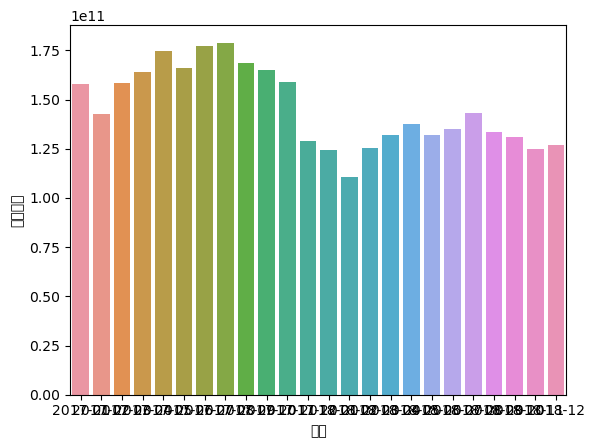

In [21]:
sns.barplot(data=groupby_ym, x='연월', y='이용금액')

### 추가 설정 필요
#### 1. 한글 사용 가능한 폰트로 바꾸기
#### 2. X축 겹쳐져 있는 글자 해결
#### 3. Y축 표기법 형태 바꾸기

In [22]:
# 그래프 설정 변경 
plt.rcParams.update({
    'figure.figsize': [10, 5],      # 그래프 크기 변경
    'font.family': 'Malgun Gothic'  # 그래프 한글 표현
})

Text(0.5, 1.0, '연령별 카드 이용 금액')

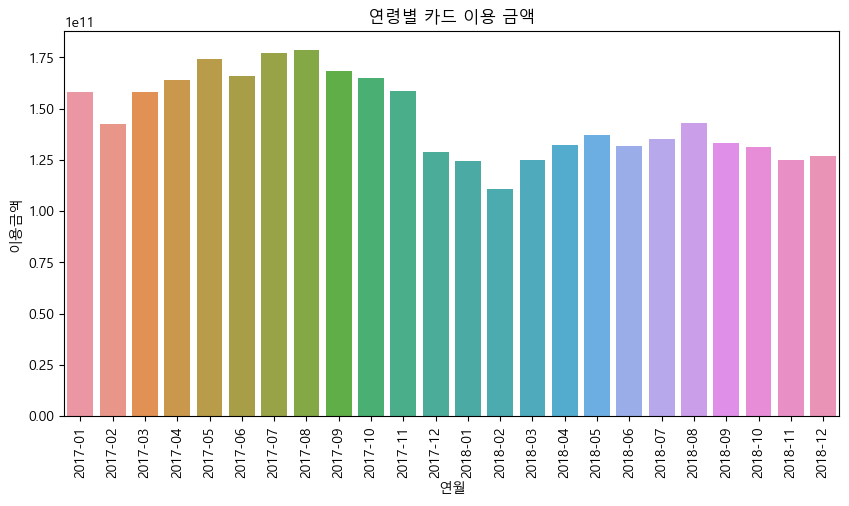

In [23]:
sns.barplot(data=groupby_ym, x='연월', y='이용금액')
plt.xticks(rotation=90)
plt.title('연령별 카드 이용 금액')

### 1e11 = 10의 11제곱 = 100,000,000,000
### plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))


Text(0, 0.5, '이용금액(억)')

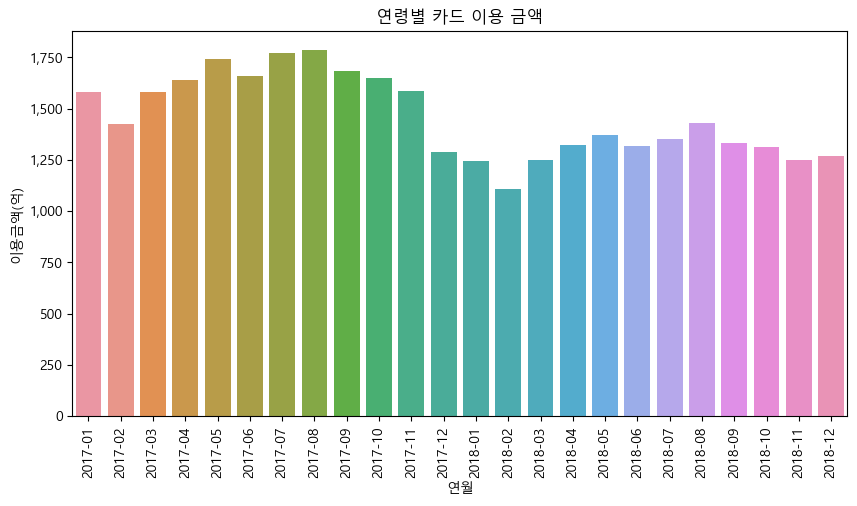

In [24]:
sns.barplot(data=groupby_ym, x='연월', y='이용금액')
plt.xticks(rotation=90)
plt.title('연령별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

### *2017년과 비교했을 때 2018년도가 전체적으로 이용금액이 적다*

### 2017년과 2018년의 이용금액 비교

In [25]:
df

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100,2018
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000,2018
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000,2018
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500,2018
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
16702,제주도,서귀포시,도심,교통,내국인관광객,40대,남,2017-01,1891,2241,101651320,2017
16703,제주도,서귀포시,도심,교통,내국인관광객,30대,여,2017-01,1033,1138,36637253,2017
16704,제주도,서귀포시,도심,교통,내국인관광객,30대,남,2017-01,1570,1922,85201203,2017
16705,제주도,서귀포시,도심,교통,내국인관광객,20대,여,2017-01,593,631,18802900,2017


In [26]:
groupby_ym_age = df.groupby(['연도', '연령대']).sum()
groupby_ym_age

이용자수      이용횟수          이용금액
연도   연령대                                   
2017 20대    4800559   9304114  208175160124
     20대미만   203078    429896    4996657612
     30대    7080363  13499213  437721213544
     40대    6965143  14414930  561248406540
     50대    5158034  10314259  468286978356
     60대이상  2640430   5069478  260136246561
2018 20대    4262563   8714136  175770246392
     20대미만   216056    475236    5027234286
     30대    5759053  11372820  320955678476
     40대    6081331  12925032  442123304148
     50대    4646069   9557381  387615338975
     60대이상  2455835   4797560  224759157547

In [27]:
groupby_ym_age = groupby_ym_age.reset_index()
groupby_ym_age

,연도,연령대,이용자수,이용횟수,이용금액
0,2017,20대,4800559,9304114,208175160124
1,2017,20대미만,203078,429896,4996657612
2,2017,30대,7080363,13499213,437721213544
3,2017,40대,6965143,14414930,561248406540
4,2017,50대,5158034,10314259,468286978356
5,2017,60대이상,2640430,5069478,260136246561
6,2018,20대,4262563,8714136,175770246392
7,2018,20대미만,216056,475236,5027234286
8,2018,30대,5759053,11372820,320955678476
9,2018,40대,6081331,12925032,442123304148


Text(0, 0.5, '이용금액(억)')

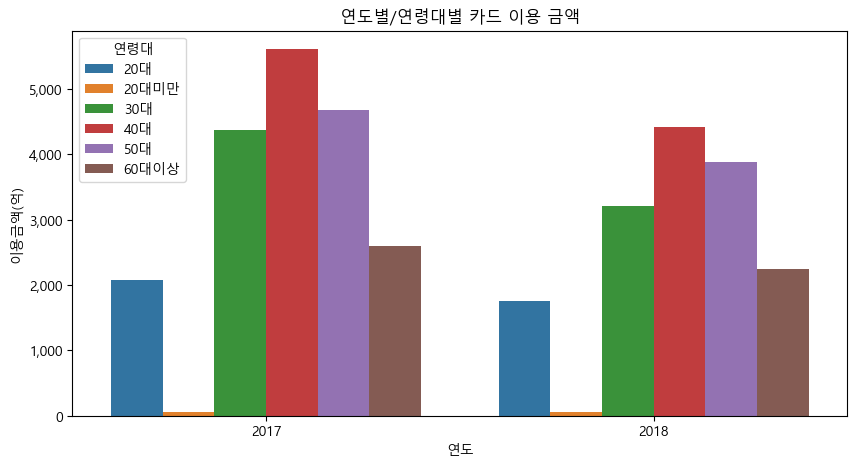

In [28]:
sns.barplot(data=groupby_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

### 추가 설정
#### 1. 막대 표시 순서 바꾸기 (20대미만 - 20대)

In [29]:
df['연령대'] = pd.Categorical(df['연령대'], categories=['20대미만', '20대', '30대', '40대', '50대', '60대이상'], ordered=True)

C:\Users\관리자\AppData\Local\Temp\ipykernel_23764\2188159711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연령대'] = pd.Categorical(df['연령대'], categories=['20대미만', '20대', '30대', '40대', '50대', '60대이상'], ordered=True)


In [30]:
# pd.Categorical을 사용해 df['연령대'] 열의 데이터를 범주형 데이터로 변환
# ordered=True : 범주형 데이터에 순서를 부여

groupby_ym_age['연령대'] = pd.Categorical(groupby_ym_age['연령대'], categories=['20대미만', '20대', '30대', '40대', '50대', '60대이상'], ordered=True)

Text(0, 0.5, '이용금액(억)')

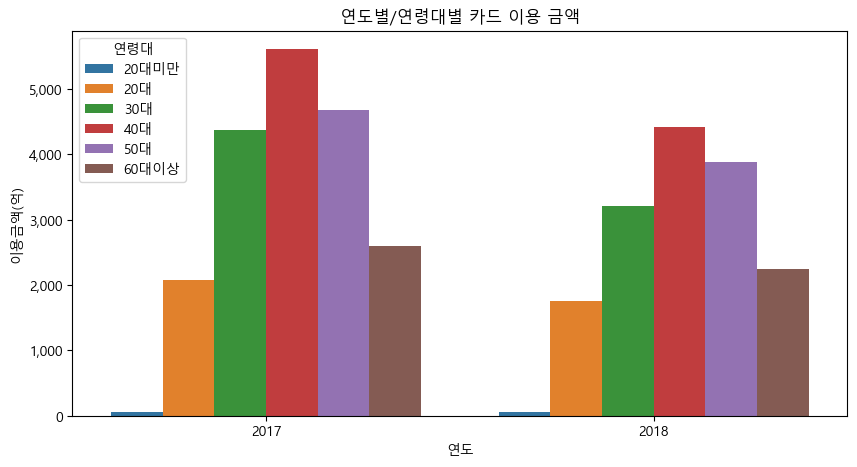

In [31]:
sns.barplot(data=groupby_ym_age, x='연도', y='이용금액', hue='연령대', hue_order = ['20대미만', '20대', '30대', '40대', '50대', '60대이상'])
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

### *2018년도가 전체적으로 이용금액이 감소했다 연령대별 그래프를 통해 연령대는 큰 상관이 없다고 볼 수 있다* 
### *다른 원인이 있는지 살펴보자*

In [32]:
groupby_ym_user = df.groupby(['연도', '이용자 구분']).sum().reset_index()
groupby_ym_user

,연도,이용자 구분,이용자수,이용횟수,이용금액
0,2017,내국인관광객,12761026,20113119,754434825907
1,2017,제주도민,14086581,32918771,1186129836830
2,2018,내국인관광객,11179654,17830178,633357078211
3,2018,제주도민,12241253,30011987,922893881613


Text(0, 0.5, '이용금액(억)')

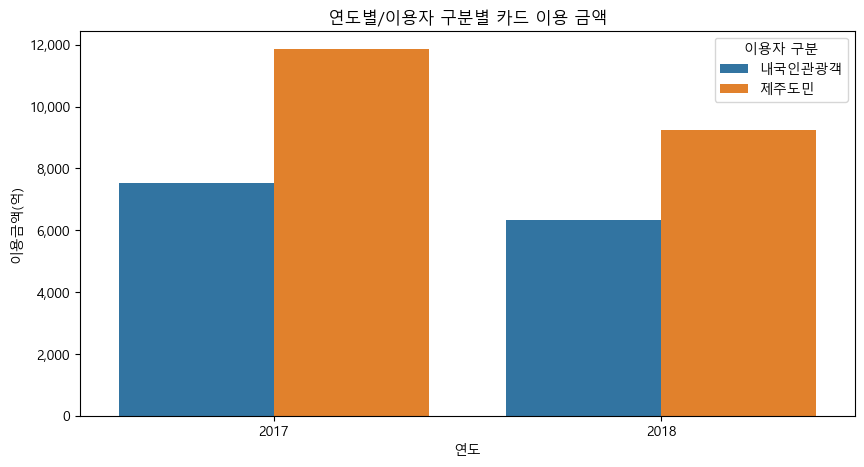

In [33]:
sns.barplot(data=groupby_ym_user, x='연도', y='이용금액', hue='이용자 구분')
plt.title('연도별/이용자 구분별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

### *제주도민과 내국인 모두 2018년도 이용금액이 감소했다* 
### *다른 원인이 있는지 살펴보자*

In [34]:
groupby_ym_market = df.groupby(['연도', '업종명']).sum().reset_index()
groupby_ym_market

,연도,업종명,이용자수,이용횟수,이용금액
0,2017,교통,2633684,3722079,218699539949
1,2017,기타,3337625,6181588,369802572061
2,2017,문화/레져,1166072,1586218,68738522691
3,2017,소매,2543030,3557900,214293310855
4,2017,쇼핑,7840104,21230344,472376164231
5,2017,숙박,492982,658658,66183404375
6,2017,식음료,8396481,15471969,457736442355
7,2017,유흥,437629,623134,72734706220
8,2018,교통,2541600,3495487,216362078283
9,2018,문화/레져,1194976,1801581,69157584998


Text(0, 0.5, '이용금액(억)')

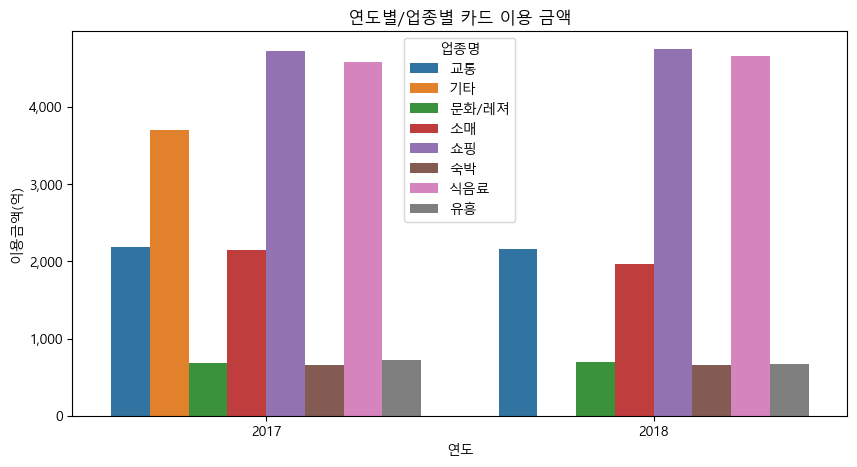

In [35]:
sns.barplot(data=groupby_ym_market, x='연도', y='이용금액', hue='업종명')
plt.title('연도별/업종별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

### *그래프를 보면 기타 항목이 2017년도에만 있고 2018년에는 없다*

In [36]:
df[df['업종명'] == '기타']

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도
8820,제주도,제주시,읍면,기타,제주도민,60대이상,여,2017-11,515,1087,68991695,2017
8821,제주도,제주시,읍면,기타,제주도민,60대이상,남,2017-11,1320,2902,248832140,2017
8822,제주도,제주시,읍면,기타,제주도민,50대,여,2017-11,825,1586,105991421,2017
8823,제주도,제주시,읍면,기타,제주도민,50대,남,2017-11,1623,3314,344444658,2017
8824,제주도,제주시,읍면,기타,제주도민,40대,여,2017-11,1064,1955,197205323,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
16682,제주도,서귀포시,도심,기타,내국인관광객,30대,여,2017-01,1126,1661,61983110,2017
16683,제주도,서귀포시,도심,기타,내국인관광객,30대,남,2017-01,1289,1902,54641270,2017
16684,제주도,서귀포시,도심,기타,내국인관광객,20대,여,2017-01,795,1060,29265651,2017
16685,제주도,서귀포시,도심,기타,내국인관광객,20대,남,2017-01,719,987,19987700,2017


### *그렇다면 업종명이 '기타'인 것들은 모두 제외시킬 것*

### 업종명 컬럼 전처리

In [37]:
df = df[df['업종명'] != '기타']

In [38]:
df

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100,2018
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000,2018
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000,2018
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500,2018
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
16702,제주도,서귀포시,도심,교통,내국인관광객,40대,남,2017-01,1891,2241,101651320,2017
16703,제주도,서귀포시,도심,교통,내국인관광객,30대,여,2017-01,1033,1138,36637253,2017
16704,제주도,서귀포시,도심,교통,내국인관광객,30대,남,2017-01,1570,1922,85201203,2017
16705,제주도,서귀포시,도심,교통,내국인관광객,20대,여,2017-01,593,631,18802900,2017


### 새로운 데이터를 가지고 연도/연령대별, 연도/이용자 구분별, 연도/업종별 그래프를 다시 그려보자

In [39]:
groupby_ym_age = df.groupby(['연도', '연령대']).sum().reset_index()
groupby_ym_age

,연도,연령대,이용자수,이용횟수,이용금액
0,2017,20대미만,185713,403969,4450994233
1,2017,20대,4347006,8615947,176570078165
2,2017,30대,6184592,11858528,344692777529
3,2017,40대,6069777,12663864,452445421492
4,2017,50대,4495433,9043516,384068677480
5,2017,60대이상,2227461,4264478,208534141777
6,2018,20대미만,216056,475236,5027234286
7,2018,20대,4262563,8714136,175770246392
8,2018,30대,5759053,11372820,320955678476
9,2018,40대,6081331,12925032,442123304148


Text(0, 0.5, '이용금액(억)')

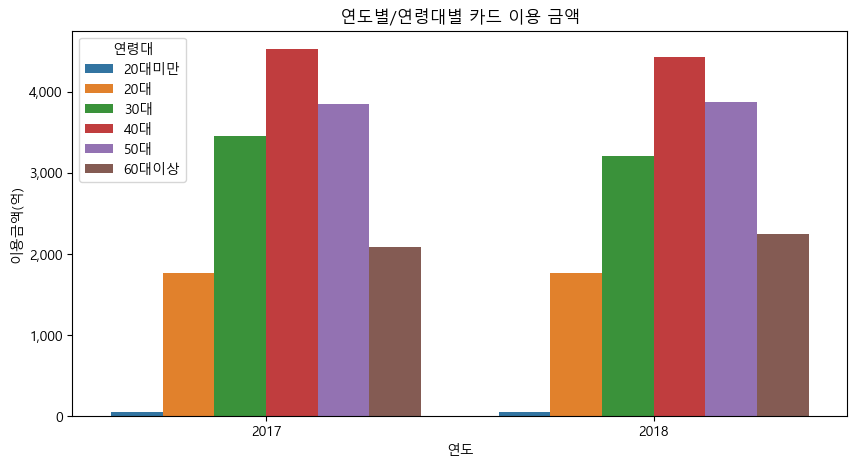

In [40]:
sns.barplot(data=groupby_ym_age, x='연도', y='이용금액', hue='연령대', hue_order = ['20대미만', '20대', '30대', '40대', '50대', '60대이상'])
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [41]:
groupby_ym_user = df.groupby(['연도', '이용자 구분']).sum().reset_index()
groupby_ym_user

,연도,이용자 구분,이용자수,이용횟수,이용금액
0,2017,내국인관광객,11521604,18101936,658967772204
1,2017,제주도민,11988378,28748366,911794318472
2,2018,내국인관광객,11179654,17830178,633357078211
3,2018,제주도민,12241253,30011987,922893881613


Text(0, 0.5, '이용금액(억)')

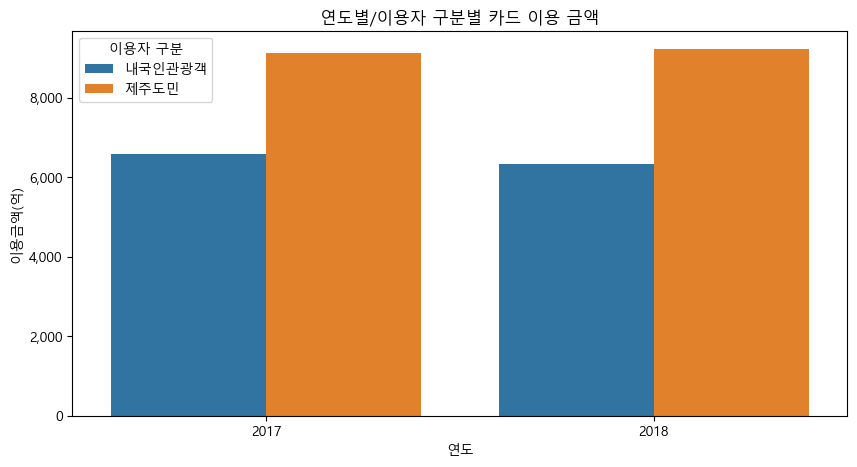

In [42]:
sns.barplot(data=groupby_ym_user, x='연도', y='이용금액', hue='이용자 구분')
plt.title('연도별/이용자 구분별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [43]:
groupby_ym_market = df.groupby(['연도', '업종명']).sum().reset_index()
groupby_ym_market

,연도,업종명,이용자수,이용횟수,이용금액
0,2017,교통,2633684,3722079,218699539949
1,2017,문화/레져,1166072,1586218,68738522691
2,2017,소매,2543030,3557900,214293310855
3,2017,쇼핑,7840104,21230344,472376164231
4,2017,숙박,492982,658658,66183404375
5,2017,식음료,8396481,15471969,457736442355
6,2017,유흥,437629,623134,72734706220
7,2018,교통,2541600,3495487,216362078283
8,2018,문화/레져,1194976,1801581,69157584998
9,2018,소매,2387234,3327299,196834001389


Text(0, 0.5, '이용금액(억)')

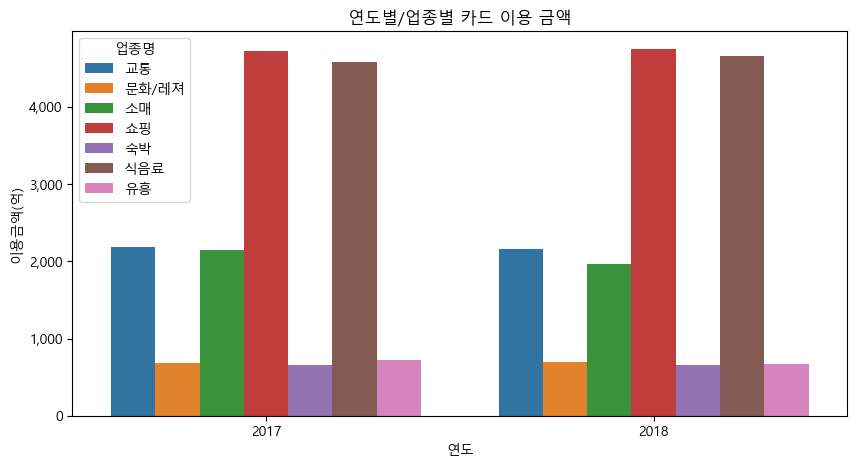

In [44]:
sns.barplot(data=groupby_ym_market, x='연도', y='이용금액', hue='업종명')
plt.title('연도별/업종별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

### *기타 업종을 제외하니 각 연도의 그래프가 거의 비슷해 보인다*

## 4. 연령대별 카드 소비 비교하기

### 연령대별 이용 금액 시각화

In [45]:
df

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100,2018
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000,2018
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000,2018
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500,2018
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
16702,제주도,서귀포시,도심,교통,내국인관광객,40대,남,2017-01,1891,2241,101651320,2017
16703,제주도,서귀포시,도심,교통,내국인관광객,30대,여,2017-01,1033,1138,36637253,2017
16704,제주도,서귀포시,도심,교통,내국인관광객,30대,남,2017-01,1570,1922,85201203,2017
16705,제주도,서귀포시,도심,교통,내국인관광객,20대,여,2017-01,593,631,18802900,2017


In [46]:
groupby_age = df.groupby('연령대').sum().reset_index()
groupby_age

,연령대,이용자수,이용횟수,이용금액
0,20대미만,401769,879205,9478228519
1,20대,8609569,17330083,352340324557
2,30대,11943645,23231348,665648456005
3,40대,12151108,25588896,894568725640
4,50대,9141502,18600897,771684016455
5,60대이상,4683296,9062038,433293299324


### 각 연령대가 차지하는 비중을 한눈에 알아보기 위해 파이 차트를 그려보자

Text(0.5, 1.0, '연령대별 카드 이용자 수 비중')

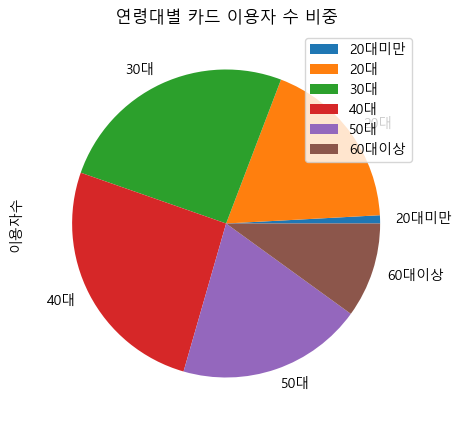

In [47]:
groupby_age.plot(kind='pie', y='이용자수', labels=groupby_age['연령대'])
plt.title('연령대별 카드 이용자 수 비중')

Text(0.5, 1.0, '연령대별 카드 이용자 수 비중')

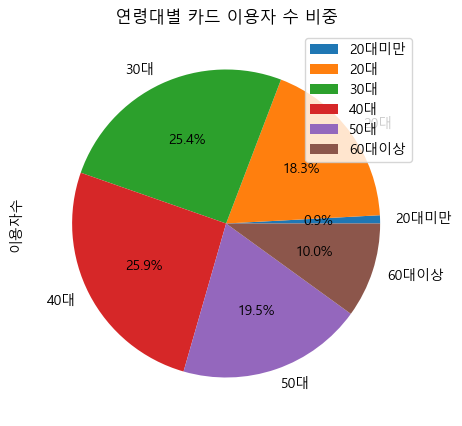

In [48]:
# 각 섹션에 퍼센트 값을 표시
groupby_age.plot(kind='pie', y='이용자수', labels=groupby_age['연령대'], autopct='%.1f%%')
plt.title('연령대별 카드 이용자 수 비중')

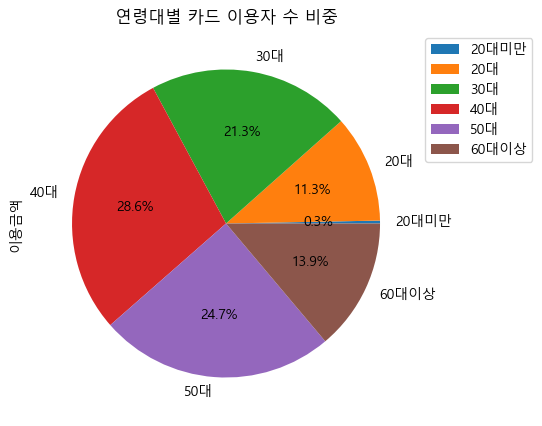

In [49]:
groupby_age.plot(kind='pie', y='이용금액', labels=groupby_age['연령대'], autopct='%.1f%%')
plt.title('연령대별 카드 이용자 수 비중')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### *20-30대에 비해 40-50대가 이용금액의 비중이 크다*

### 이용금액을 인당 이용금액으로 환산해 보면 어떨까?

In [50]:
groupby_age

,연령대,이용자수,이용횟수,이용금액
0,20대미만,401769,879205,9478228519
1,20대,8609569,17330083,352340324557
2,30대,11943645,23231348,665648456005
3,40대,12151108,25588896,894568725640
4,50대,9141502,18600897,771684016455
5,60대이상,4683296,9062038,433293299324


In [51]:
groupby_age['인당이용금액'] = groupby_age['이용금액'] / groupby_age['이용자수']
groupby_age

,연령대,이용자수,이용횟수,이용금액,인당이용금액
0,20대미만,401769,879205,9478228519,23591.239043
1,20대,8609569,17330083,352340324557,40924.269793
2,30대,11943645,23231348,665648456005,55732.438130
3,40대,12151108,25588896,894568725640,73620.341918
4,50대,9141502,18600897,771684016455,84415.451252
5,60대이상,4683296,9062038,433293299324,92518.879721


Text(0.5, 1.0, '연령대별 인당 카드 이용 금액')

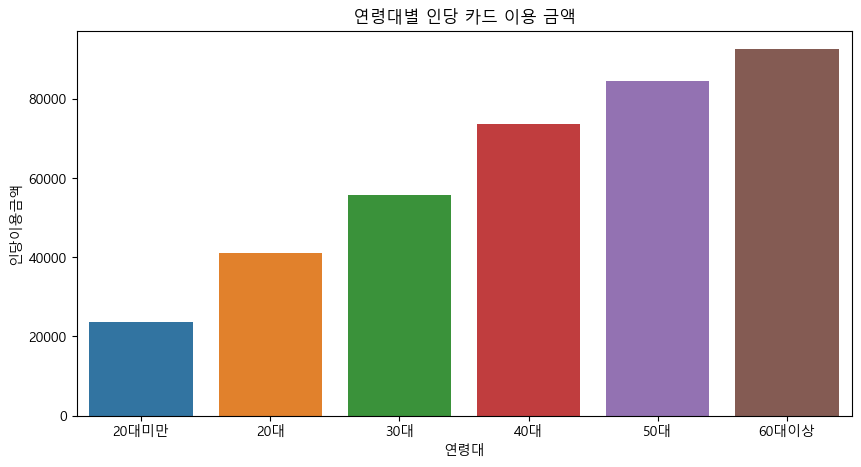

In [52]:
sns.barplot(data=groupby_age, x='연령대', y='인당이용금액')
plt.title('연령대별 인당 카드 이용 금액')

### Y축에 있는 값 천 단위로 콤마를 찍을 수 있다
### plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

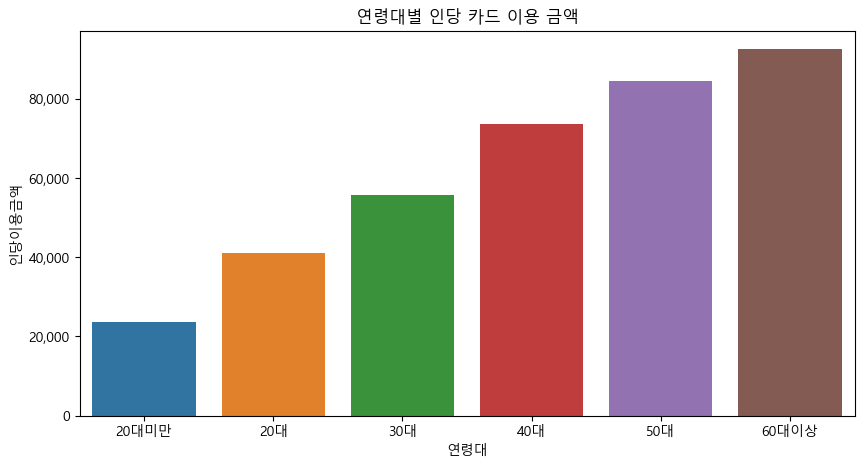

In [53]:
sns.barplot(data=groupby_age, x='연령대', y='인당이용금액')
plt.title('연령대별 인당 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

### 연령대별/업종별 이용금액 시각화

In [54]:
groupby_age_market = df.groupby(['연령대', '업종명']).sum().reset_index()
groupby_age_market

,연령대,업종명,이용자수,이용횟수,이용금액
0,20대미만,교통,3740,4705,285316774
1,20대미만,문화/레져,40499,80073,805245645
2,20대미만,소매,56257,77825,1638514065
3,20대미만,쇼핑,164635,453747,3008788954
4,20대미만,숙박,3681,4953,114390996
5,20대미만,식음료,130781,254934,3477626140
6,20대미만,유흥,2176,2968,148345945
7,20대,교통,691799,832507,45278277733
8,20대,문화/레져,450991,749958,12465321269
9,20대,소매,832913,1125058,37445127141


Text(0, 0.5, '이용금액(억)')

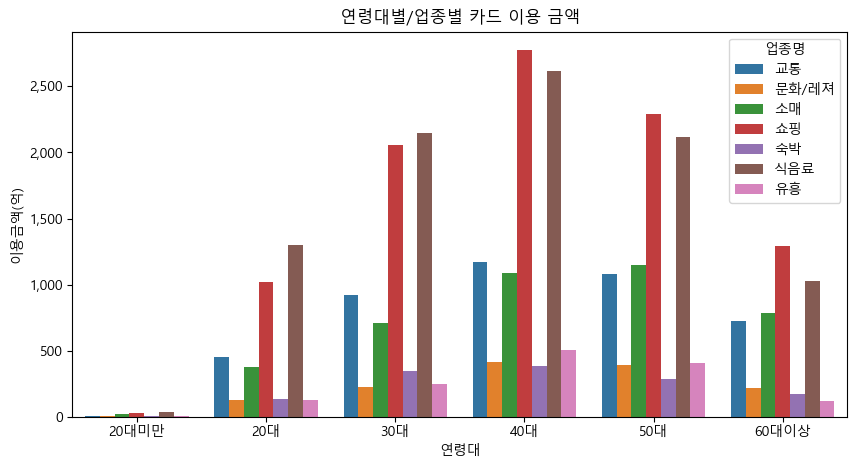

In [55]:
sns.barplot(data=groupby_age_market, x='연령대', y='이용금액', hue='업종명')
plt.title('연령대별/업종별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

### *전체적으로 식음료와 쇼핑이 차지하는 비중이 크다*

### 연령대별/업종별 인당 이용금액 시각화

In [56]:
groupby_age_market['인당이용금액'] = groupby_age_market['이용금액'] / groupby_age_market['이용자수']
groupby_age_market

,연령대,업종명,이용자수,이용횟수,이용금액,인당이용금액
0,20대미만,교통,3740,4705,285316774,76287.907487
1,20대미만,문화/레져,40499,80073,805245645,19883.099459
2,20대미만,소매,56257,77825,1638514065,29125.514425
3,20대미만,쇼핑,164635,453747,3008788954,18275.512218
4,20대미만,숙박,3681,4953,114390996,31076.065200
5,20대미만,식음료,130781,254934,3477626140,26591.218449
6,20대미만,유흥,2176,2968,148345945,68173.687960
7,20대,교통,691799,832507,45278277733,65450.047966
8,20대,문화/레져,450991,749958,12465321269,27639.844851
9,20대,소매,832913,1125058,37445127141,44956.828794


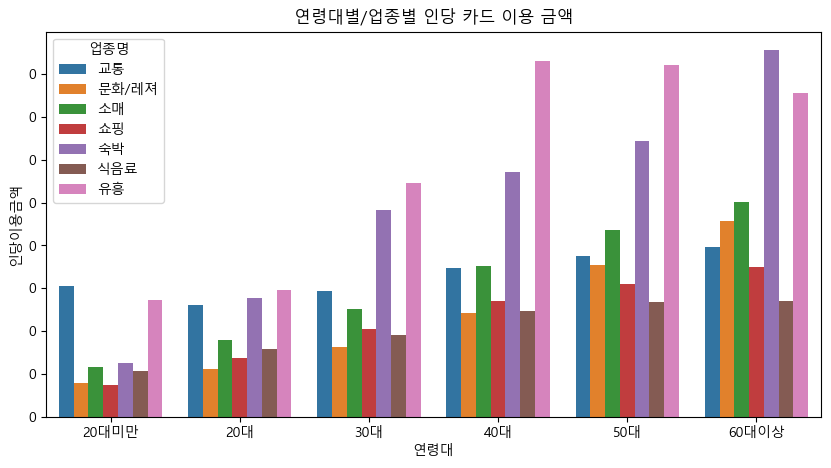

In [57]:
sns.barplot(data=groupby_age_market, x='연령대', y='인당이용금액', hue='업종명')
plt.title('연령대별/업종별 인당 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))

### *인당 이용금액 그래프를 보니 20대미만 쪽에 있는 막대들도 보이고, 대체적으로 유흥이 높다는 것을 알 수 있다*

### 연령대별로 하나씩 그래프(파이 차트)를 그려보자

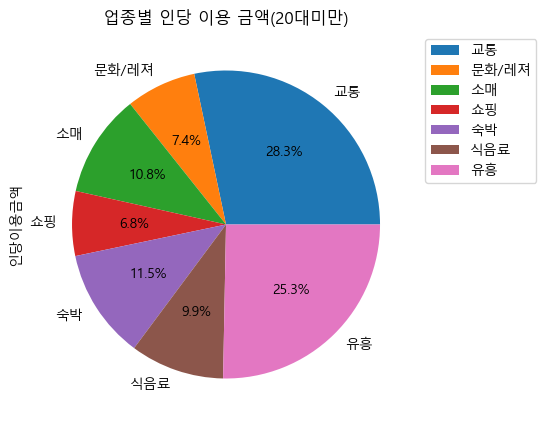

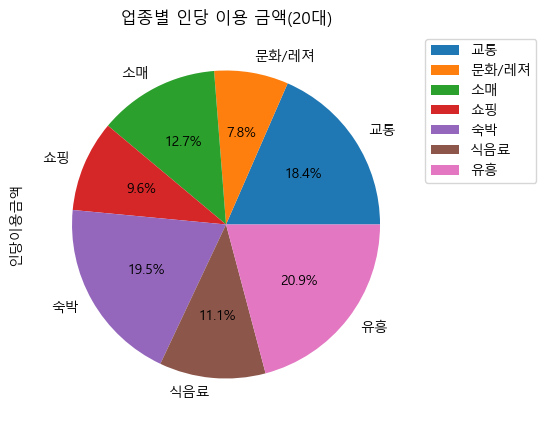

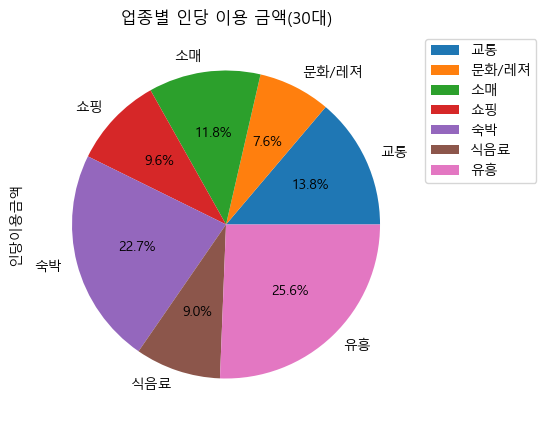

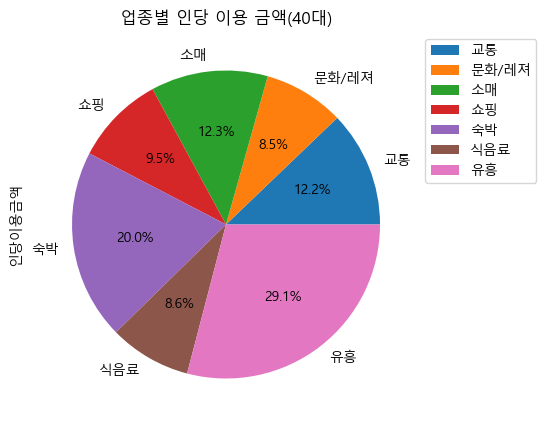

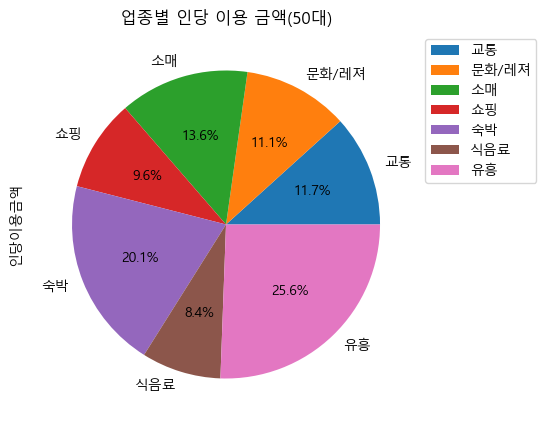

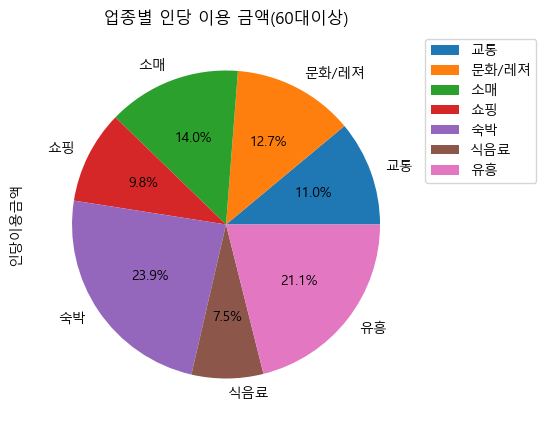

In [58]:
for age in groupby_age_market['연령대'].unique():
    data = groupby_age_market[groupby_age_market['연령대'] == age]
    data.plot(kind='pie', y='인당이용금액', labels=data['업종명'], autopct='%.1f%%')
    plt.title(f'업종별 인당 이용 금액({age})')
    plt.xticks(rotation=90)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

### 연령대별/연월별 이용 금액 시각화

In [59]:
groupby_age_ym = df.groupby(['연령대', '연월']).sum().reset_index()
groupby_age_ym

,연령대,연월,이용자수,이용횟수,이용금액
0,20대미만,2017-01,9309,20559,268333120
1,20대미만,2017-02,11215,23639,295809774
2,20대미만,2017-03,12917,28538,308058609
3,20대미만,2017-04,16743,34933,356994878
4,20대미만,2017-05,21319,39980,428037371
...,...,...,...,...,...
139,60대이상,2018-08,207769,431089,18101783583
140,60대이상,2018-09,208388,415272,19520727242
141,60대이상,2018-10,211715,412289,19193470928
142,60대이상,2018-11,207957,398300,19587261157


<AxesSubplot:xlabel='연령대', ylabel='이용금액'>

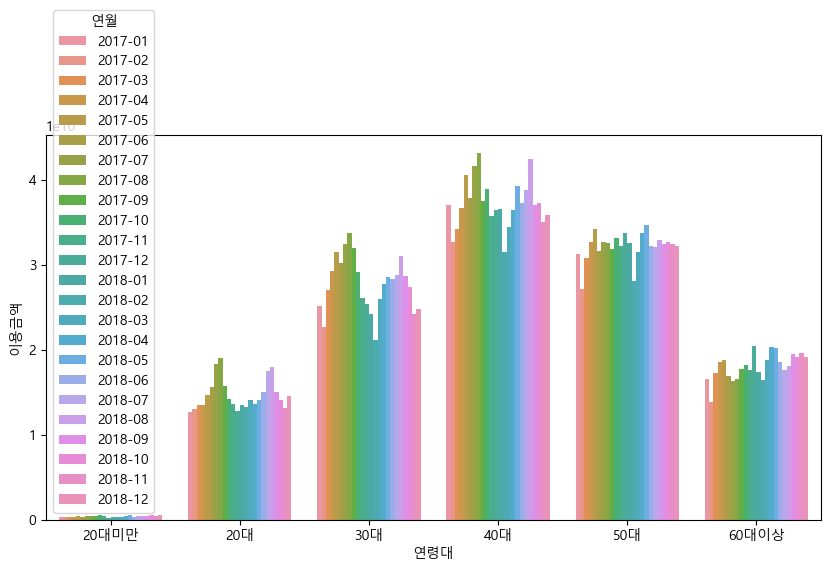

In [60]:
sns.barplot(data=groupby_age_ym, x='연령대', y='이용금액', hue='연월')

### 이것도 연령대별로 하나씩 그래프를 그려보자

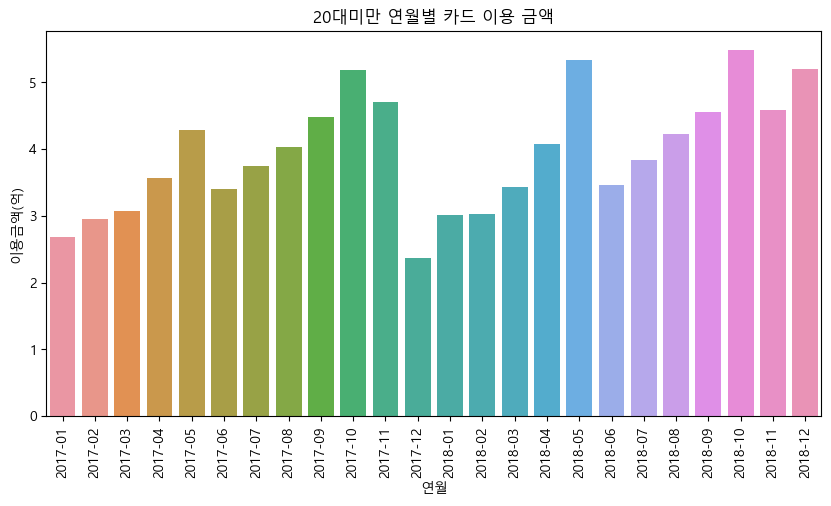

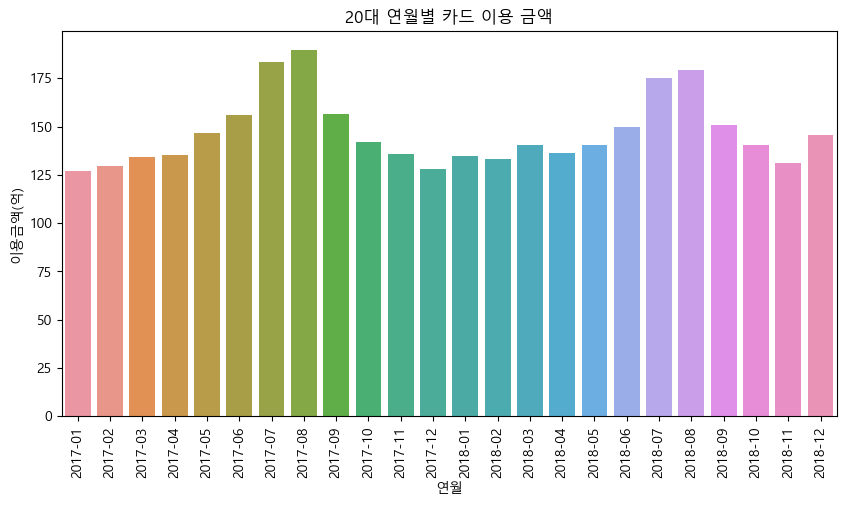

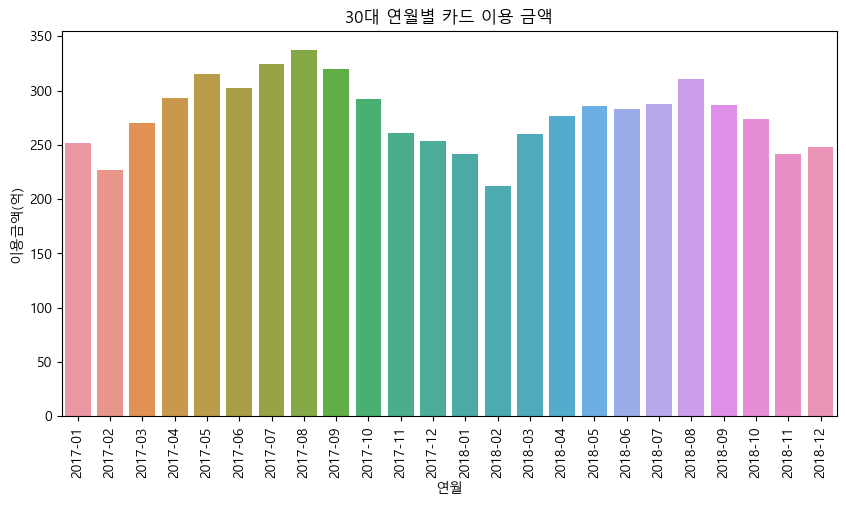

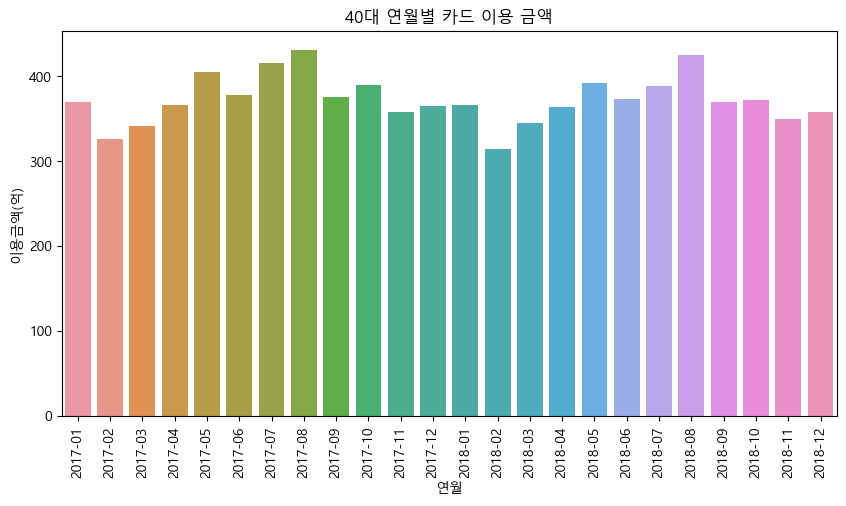

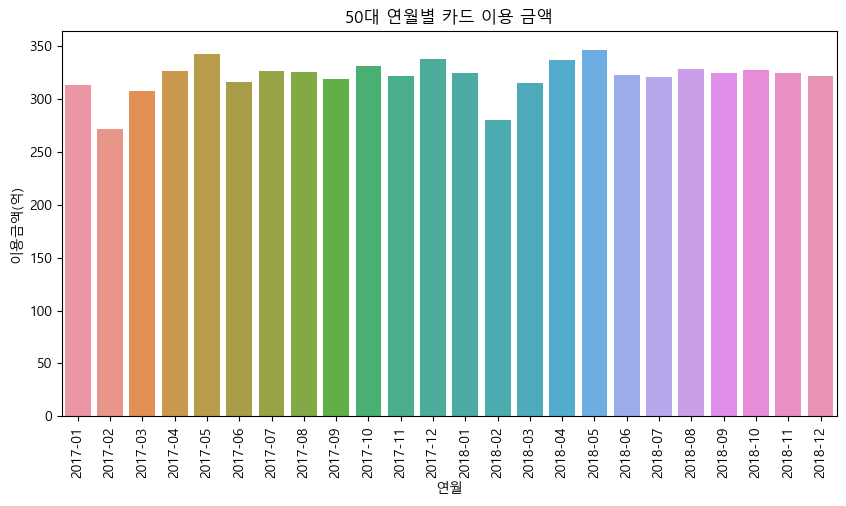

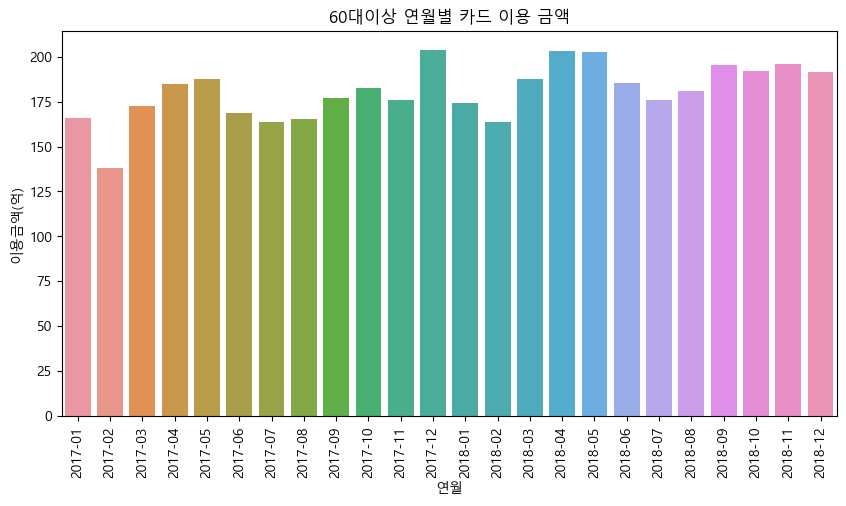

In [61]:
for age in groupby_age_ym['연령대'].unique():
    data = groupby_age_ym[groupby_age_ym['연령대'] == age]
    sns.barplot(data=data, x='연월', y='이용금액')
    plt.title(f'{age} 연월별 카드 이용 금액')
    plt.xticks(rotation=90)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
    plt.ylabel('이용금액(억)')
    plt.show()

### *일단 대부분 여름휴가철인 7-8월에 이용금액이 집중되어 있고, 20대는 특히 7-8월에 이용금액이 가파르게 증가*
### *20대 미만은 5월과 10월에 이용금액이 가장 많고, 60대 이상은 여름철보다는 봄과 초겨울에 이용금액이 더 많음*
### *50대는 비수기인 2월의 감소분을 제외하면, 다른 연령대에 비해 월별 이용금액이 비교적 꾸준히 유지*